# Life expectancy
life expectancy atau harapan hidup adalah suatu indikator untuk melihat kualitas hidup suatu populasi. indikator ini dapat dipengaruhi beberapa faktor, salah satunya dalam bidang kesehatan dan ekonomi. kita akan melihat pengaruh faktor tersebut dalam indeks kualitas hidup dalam beberapa negara.

## Variable Index
1. Country (object): Name of the country.
2. Region (object): Geographic region of the country.
3. Year (float64): Year of the data (averaged or interpolated).
4. Infant_deaths (float64): Number of infant deaths per 1000 live births.
5. Under_five_deaths (float64): Number of deaths of children under five per 1000 live births.
6. Adult_mortality (float64): Adult mortality rate per 1000 population.
7. Alcohol_consumption (float64): Per capita alcohol consumption in liters of pure alcohol.
8. Hepatitis_B (float64): Percentage of immunization coverage for Hepatitis B.
9. Measles (float64): Number of reported measles cases.
10. BMI (float64): Average Body Mass Index of the population.
11. Polio (float64): Percentage of immunization coverage for polio.
12. Diphtheria (float64): Percentage of immunization coverage for diphtheria.
13. Incidents_HIV (float64): Number of new HIV infections per 1000 uninfected population.
14. GDP_per_capita (float64): Gross Domestic Product per capita in USD.
15. Population_mln (float64): Population size in millions.
16. Thinness_ten_nineteen_years (float64): Prevalence of thinness (BMI < 18.5) among adolescents aged 10-19.
17. Thinness_five_nine_years (float64): Prevalence of thinness (BMI < 18.5) among children aged 5-9.
18. Schooling (float64): Average years of schooling.19
19. Economy_status (float64): Economic classification of the country (e.g., developing or developed).
20. Life_expectancy (float64): Average life expectancy in years.

## import package

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


## Load data

In [2]:
df = pd.read_csv("/content/Life-Expectancy-Data-Averaged.csv")
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


## Data Understanding and Analysis

In [42]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      179 non-null    object 
 1   Region                       179 non-null    object 
 2   Year                         179 non-null    float64
 3   Infant_deaths                179 non-null    float64
 4   Under_five_deaths            179 non-null    float64
 5   Adult_mortality              179 non-null    float64
 6   Alcohol_consumption          179 non-null    float64
 7   Hepatitis_B                  179 non-null    float64
 8   Measles                      179 non-null    float64
 9   BMI                          179 non-null    float64
 10  Polio                        179 non-null    float64
 11  Diphtheria                   179 non-null    float64
 12  Incidents_HIV                179 non-null    float64
 13  GDP_per_capita      

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Schooling,Economy_status,Life_expectancy,GDP_per_capita_up,Polio_up,Schooling_up,Life_expectancy_up_lr,Life_expectancy_up_rf,Life_expectancy_down_lr,Life_expectancy_down_rf
count,179.0,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2007.5,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,...,7.632123,0.793296,68.856075,12695.017423,90.831355,8.013729,69.548822,69.397641,68.141843,68.195262
std,0.0,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,...,3.126912,0.406077,9.197699,18582.359601,13.069080,3.283258,7.779754,8.192732,9.516784,9.301048
min,2007.5,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,...,1.337500,0.000000,45.606250,290.331250,40.750000,1.404375,44.261728,49.419375,36.882028,48.002312
25%,2007.5,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,...,4.946875,1.000000,62.303125,1550.896875,85.531250,5.194219,64.110288,62.142656,61.416557,59.465563
50%,2007.5,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,...,7.831250,1.000000,71.506250,4842.887500,97.375000,8.222812,71.916859,72.106125,71.271842,71.169250
75%,2007.5,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,...,10.365625,1.000000,74.937500,13241.559375,100.000000,10.883906,75.128757,74.602938,75.411735,75.659906
max,2007.5,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,...,13.268750,1.000000,82.456250,113269.956250,100.000000,13.932188,85.086965,81.023500,83.994441,80.815125


Region
Africa                            940.358125
Asia                             3675.558125
Central America and Caribbean      76.992500
European Union                    437.671250
Middle East                       271.040000
North America                     445.421875
Oceania                            35.536250
Rest of Europe                    300.987500
South America                     381.423125
Name: Population_mln, dtype: float64


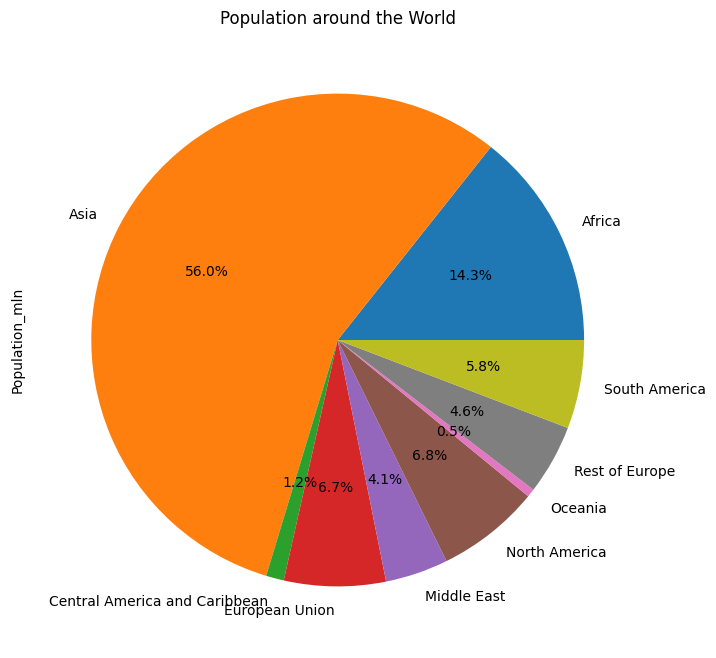

In [4]:
#jumlah populasi per Region
Population = df.groupby('Region')['Population_mln'].sum()
print(Population)

Population.plot(kind='pie',figsize=(8, 8), autopct= '%1.1f%%')
plt.title('Population around the World')
plt.show()


Region
Africa                           57.847304
Asia                             69.454861
Central America and Caribbean    72.437500
European Union                   77.715046
Middle East                      73.975446
North America                    77.841667
Oceania                          69.517614
Rest of Europe                   74.525417
South America                    72.780729
Name: Life_expectancy, dtype: float64


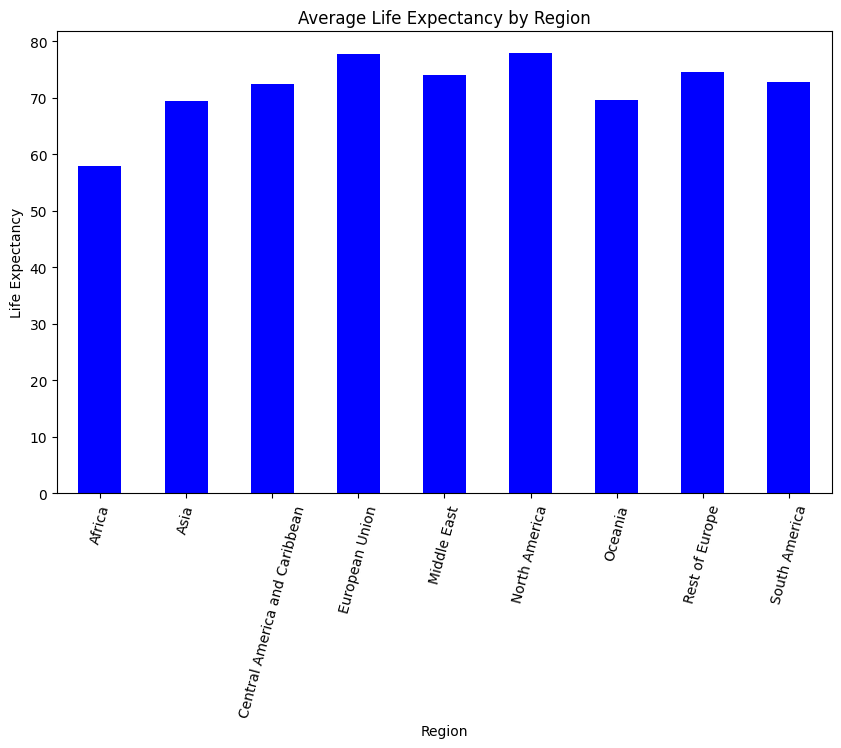

In [5]:
# Rata-rata Life Expectancy per Region
average_life_expectancy = df.groupby('Region')['Life_expectancy'].mean()
print(average_life_expectancy)


average_life_expectancy.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Average Life Expectancy by Region')
plt.ylabel('Life Expectancy')
plt.xlabel('Region')
plt.xticks(rotation=75)
plt.show()



Region
Africa                            2314.009804
Asia                              6560.958333
South America                     7232.031250
Central America and Caribbean     8387.812500
Oceania                          10146.971591
Middle East                      18957.281250
Rest of Europe                   19090.150000
European Union                   28140.368056
North America                    33783.854167
Name: GDP_per_capita, dtype: float64


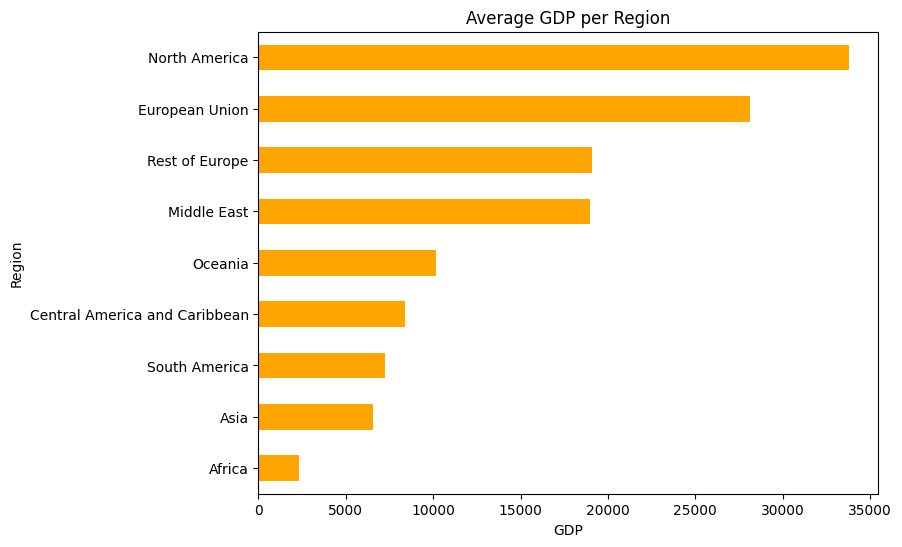

In [6]:
# rata-rata GDP per Region
GDP = df.groupby('Region')['GDP_per_capita'].mean().sort_values()
print(GDP)
GDP.plot(kind='barh',figsize=(8,6),color='orange')
plt.title('Average GDP per Region')
plt.ylabel('Region')
plt.xlabel('GDP')
plt.show()

In [7]:
#Rata-rata BMI, Alcohol, dan lama sekolah per Region
lifestyle = df.groupby('Region')[[ 'BMI','Alcohol_consumption','Schooling']].mean()
print(lifestyle)

                                     BMI  Alcohol_consumption  Schooling
Region                                                                  
Africa                         23.249265             2.980694   4.593260
Asia                           23.412269             2.401700   7.375231
Central America and Caribbean  26.274671             5.623224   7.808553
European Union                 26.021528            10.791319  11.064815
Middle East                    26.927679             0.884161   7.714286
North America                  27.429167             7.053125  11.035417
Oceania                        27.203977             2.880239   7.876705
Rest of Europe                 25.991250             7.580083  10.775417
South America                  26.071875             5.745677   8.022396


In [8]:
#Rata rata kematian tiap region
deaths = df.groupby('Region')[['Infant_deaths', 'Adult_mortality', 'Under_five_deaths']].mean()
print(deaths)



                               Infant_deaths  Adult_mortality  \
Region                                                          
Africa                             60.604044       319.073434   
Asia                               32.536111       171.166565   
Central America and Caribbean      20.965461       163.581169   
European Union                      4.872222       104.395392   
Middle East                        16.639286       111.158891   
North America                       9.925000       100.693844   
Oceania                            26.305114       162.886801   
Rest of Europe                      9.627917       138.582856   
South America                      19.953646       155.275326   

                               Under_five_deaths  
Region                                            
Africa                                 94.025000  
Asia                                   40.965278  
Central America and Caribbean          25.932237  
European Union               

In [9]:
# Rata-rata angka kematian dewasa per Region
Health = df.groupby('Region')[['Measles', 'Incidents_HIV', 'Thinness_five_nine_years', 'Thinness_ten_nineteen_years']].mean()
print(Health)


                                 Measles  Incidents_HIV  \
Region                                                    
Africa                         67.625000       2.702132   
Asia                           73.314815       0.139884   
Central America and Caribbean  82.644737       0.419375   
European Union                 88.534722       0.073912   
Middle East                    83.758929       0.089063   
North America                  87.833333       0.127917   
Oceania                        70.971591       0.155284   
Rest of Europe                 89.954167       0.107292   
South America                  74.130208       0.298333   

                               Thinness_five_nine_years  \
Region                                                    
Africa                                         7.199142   
Asia                                           9.283796   
Central America and Caribbean                  3.269737   
European Union                                 1.412037

In [10]:
# Rata-rata vaksin imunisasi per Region
Vaccine = df.groupby('Region')[['Hepatitis_B', 'Polio', 'Diphtheria']].mean()
print(Vaccine)

                               Hepatitis_B      Polio  Diphtheria
Region                                                           
Africa                           78.025735  76.205882   75.992647
Asia                             84.402778  88.194444   87.942130
Central America and Caribbean    89.980263  91.049342   90.878289
European Union                   89.208333  95.530093   95.678241
Middle East                      88.415179  90.022321   89.616071
North America                    73.291667  92.854167   93.729167
Oceania                          80.664773  81.829545   80.556818
Rest of Europe                   87.366667  92.954167   92.341667
South America                    88.036458  89.427083   89.625000


Text(0.5, 1.0, 'Life Expectancy Distribution by Region')

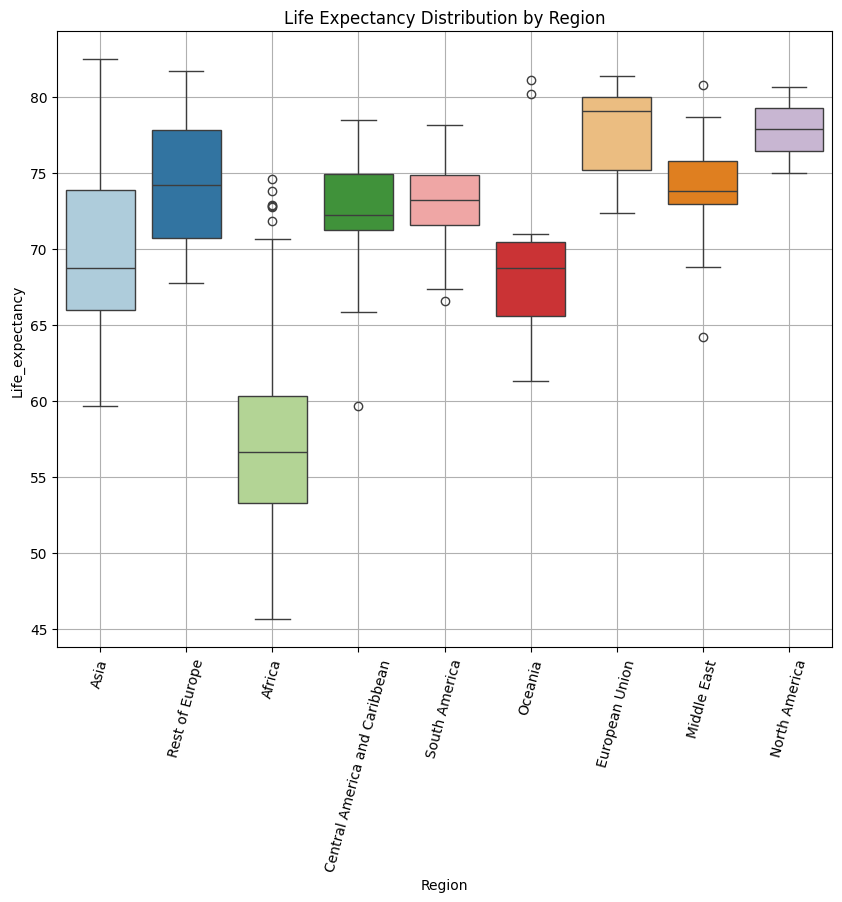

In [12]:
# distribusi data life expectancy per region
plt.figure(figsize=(10, 8))
sns.boxplot(x=df['Region'], y=df['Life_expectancy'], data=df, hue = df['Region'], palette='Paired')
plt.grid(True)
plt.xticks(rotation=75)
plt.title('Life Expectancy Distribution by Region')

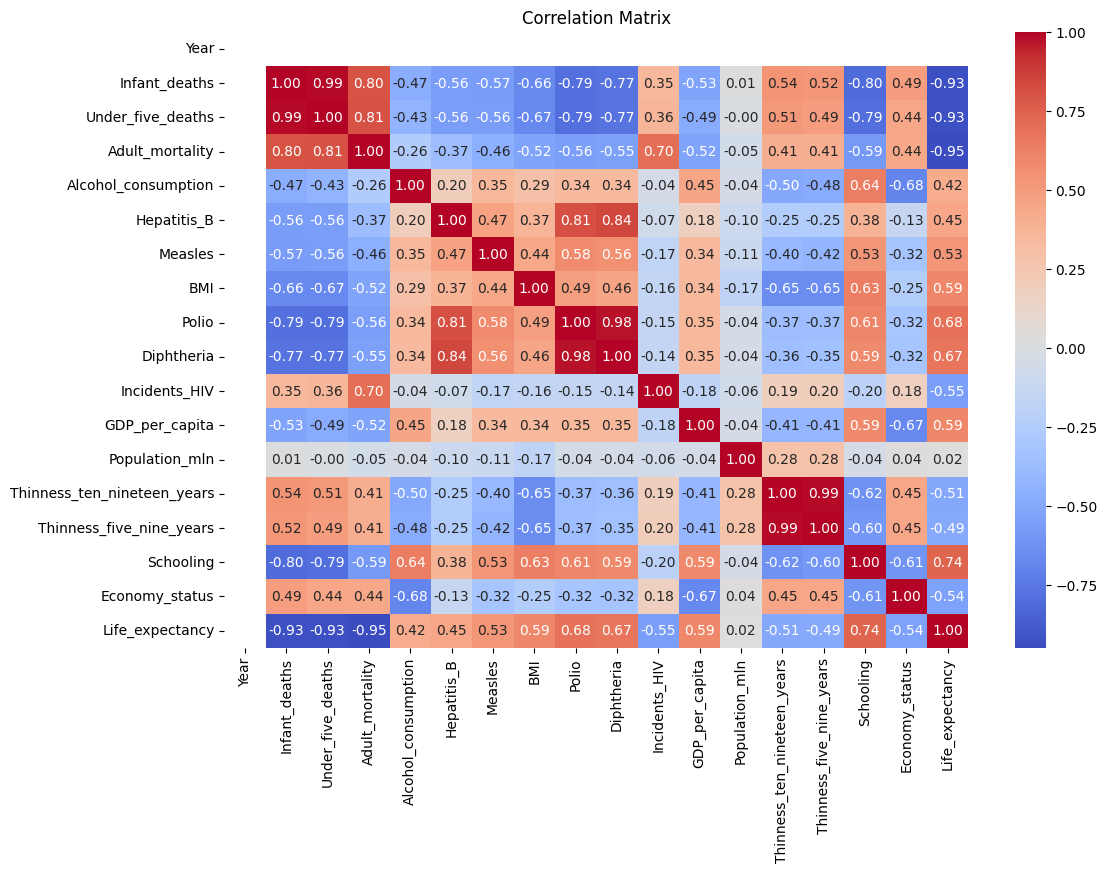

In [13]:
# Memilih hanya kolom numerik
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


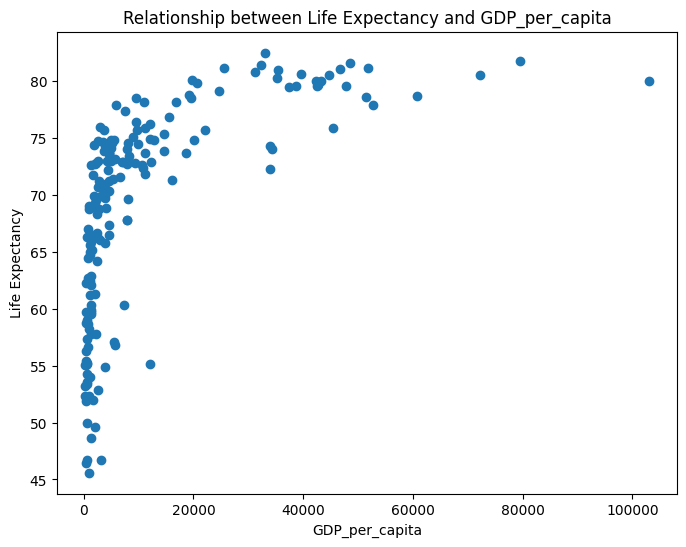

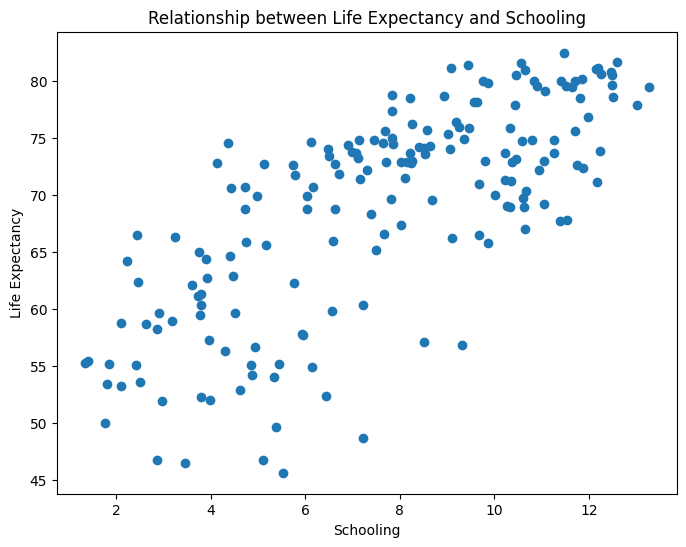

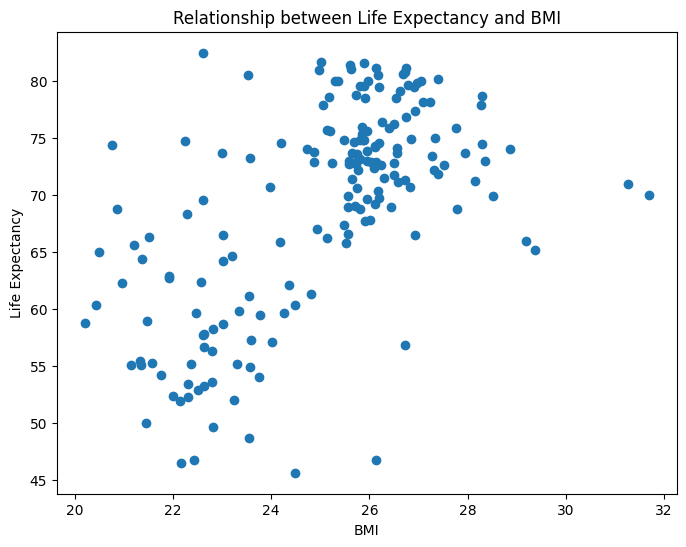

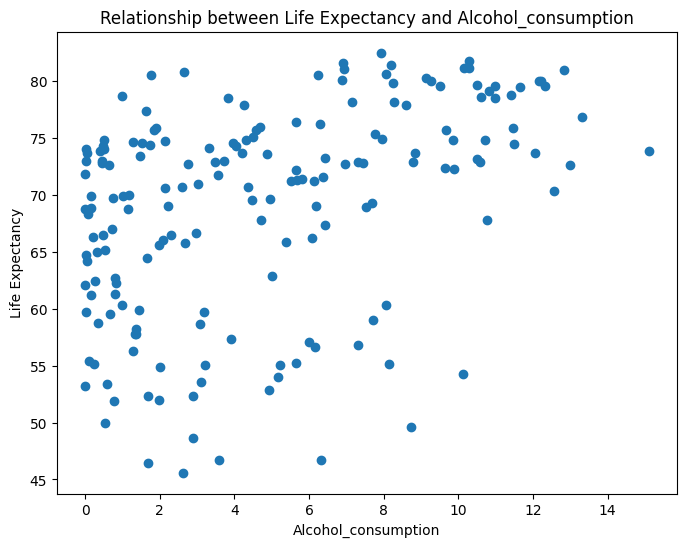

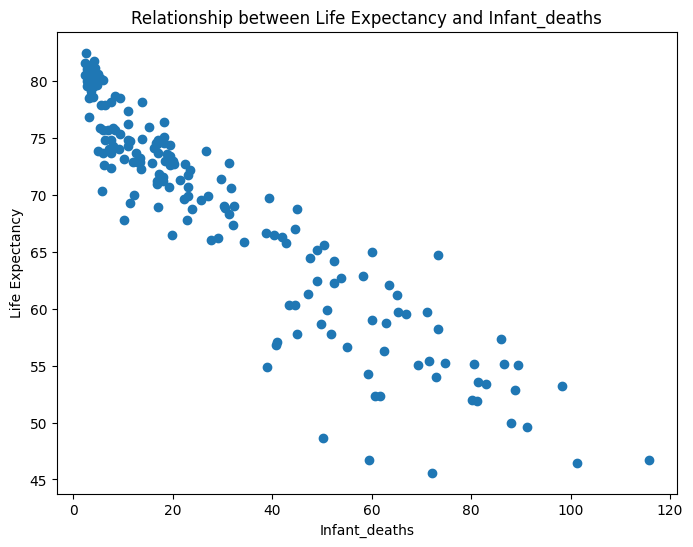

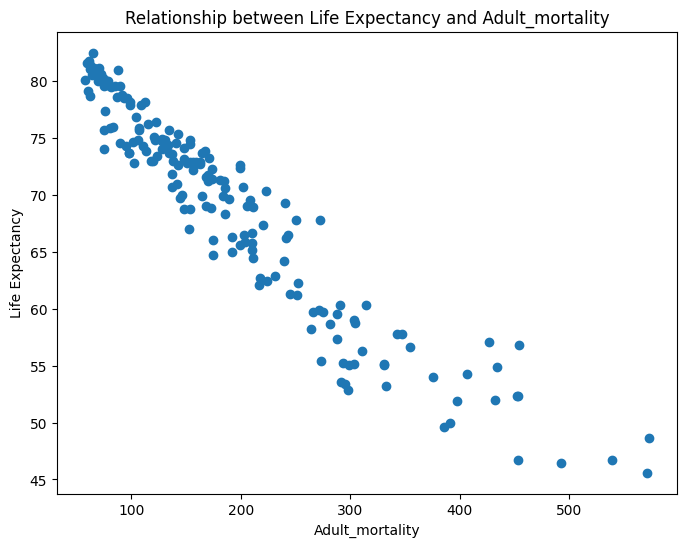

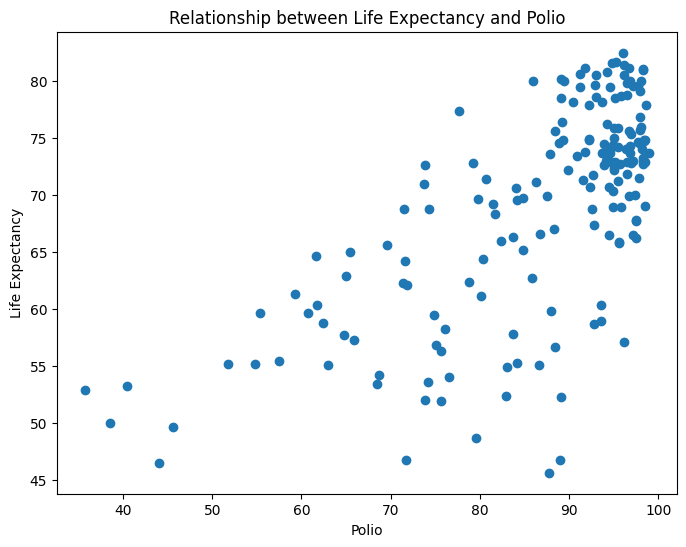

In [14]:
# Daftar variabel ekonomi dan kesehatan
variables = ['GDP_per_capita', 'Schooling', 'BMI','Alcohol_consumption',
             'Infant_deaths',  'Adult_mortality', 'Polio']

# Membuat scatter plot untuk setiap variabel
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[var], df['Life_expectancy'])
    plt.title(f'Relationship between Life Expectancy and {var}')
    plt.xlabel(var)
    plt.ylabel('Life Expectancy')
    plt.show()


In [15]:
fig = px.choropleth(df,
                    locations='Country',
                    locationmode='country names',
                    color='Life_expectancy',
                    hover_name='Country',
                    hover_data={'Region': True, 'Life_expectancy': True},
                    color_continuous_scale='Viridis',
                    title='Average Life Expectancy by Country')

fig.show()

In [16]:
# Negara dengan life expectancy dibawah rata-rata
below_average = df[df['Life_expectancy'] < df['Life_expectancy'].mean()]
below_average

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
12,Bangladesh,Asia,2007.5,45.00000,58.41875,148.109031,0.003275,85.5000,66.5625,20.86875,92.6250,92.7500,0.010000,897.3125,142.890625,13.77500,14.33125,4.72500,1.0,68.72500
17,Benin,Africa,2007.5,73.38750,115.86875,263.932625,1.375000,75.9375,83.0000,22.82500,76.1250,76.3750,0.663750,984.4375,8.629375,8.25000,8.13750,2.86875,1.0,58.20625
18,Bhutan,Asia,2007.5,40.34375,51.53750,243.186219,0.481875,94.1250,82.0625,23.02500,94.4375,93.8750,0.181250,1882.6250,0.665000,17.21875,17.92500,2.44375,1.0,66.45625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Uganda,Africa,2007.5,59.30000,94.67500,406.421531,10.125000,68.3750,64.0000,21.76250,68.6875,69.3750,3.417500,693.4375,30.305625,6.26250,6.25625,4.87500,1.0,54.21250
173,Vanuatu,Oceania,2007.5,23.95000,28.61875,153.714781,1.159375,63.5625,65.0000,25.80000,71.5000,66.9375,0.170000,2735.6250,0.223125,1.56875,1.49375,6.61875,1.0,68.71250
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


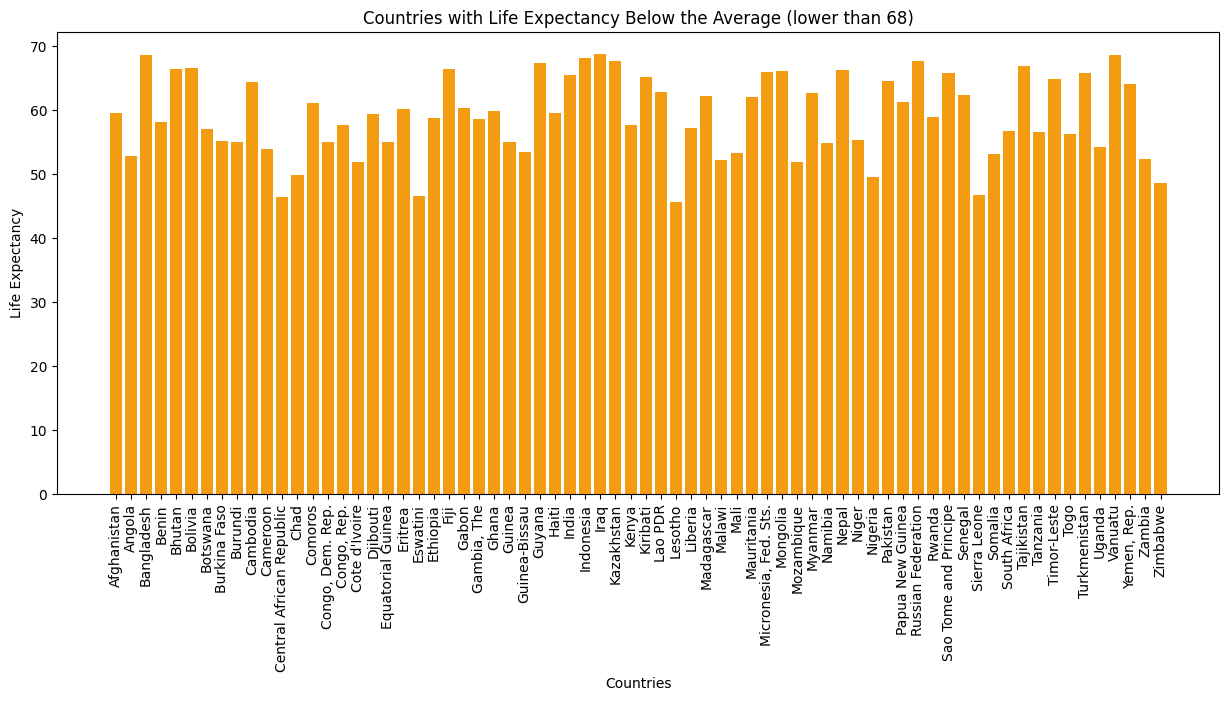

In [18]:
#Bar chart
plt.figure(figsize=(15, 6))
plt.bar(below_average['Country'], below_average['Life_expectancy'], color = '#f39c12')
plt.xlabel("Countries")
plt.ylabel("Life Expectancy")
plt.title("Countries with Life Expectancy Below the Average (lower than 68)")
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

In [52]:
# pengecekan missing value
df.isnull().sum()

,0
Country,0
Region,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0


In [53]:
# Pengecekan data duplicate
df.duplicated().sum()

0

In [54]:
# Pilih 5 fitur yang digunakan untuk prediksi
X = df[['Infant_deaths', 'Polio', 'GDP_per_capita', 'Schooling']]
y = df['Life_expectancy']

# Bagi data menjadi training dan testing (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Standarisasi Khusus untuk Linear Regression ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Prediction Model

In [58]:
# ---- Model 1: Linear Regression (dengan standarisasi) ----
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Prediksi
y_pred_lr = model_lr.predict(X_test_scaled)

# Evaluasi Linear Regression
print("=== Linear Regression ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr): .4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

# ---- Model 2: Random Forest (tanpa standarisasi) ----
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi
y_pred_rf = model_rf.predict(X_test)

# Evaluasi Random Forest
print("\n=== Random Forest ===")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf): .4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R²: {r2_score(y_test, y_pred_rf):.4f}")


=== Linear Regression ===
MAE:  2.0339
MSE: 9.9151
R²: 0.8896

=== Random Forest ===
MAE:  2.3063
MSE: 10.2645
R²: 0.8857


In [59]:
# ==== Analisis What-If Scenario ====

# Skenario Peningkatan (Meningkatkan faktor kesehatan & ekonomi)
X_scenario_up = X.copy()
X_scenario_up['GDP_per_capita'] *= 1.1  # GDP naik 10%
X_scenario_up['Polio'] = (X_scenario_up['Polio'] + 5).clip(upper=100)  # Vaksinasi polio meningkat, max 100%
X_scenario_up['Schooling'] *= 1.05  # Pendidikan naik 5%
X_scenario_up['Infant_deaths'] *= 0.9 # Infant Death turun (persentase bayi lahir lebih baik)


# Prediksi pada skenario peningkatan
X_scenario_up_scaled = scaler.transform(X_scenario_up)  # Standarisasi hanya untuk Linear Regression
df['Life_expectancy_up_lr'] = model_lr.predict(X_scenario_up_scaled)
df['Life_expectancy_up_rf'] = model_rf.predict(X_scenario_up)

# Skenario Penurunan (Menurunkan faktor kesehatan & ekonomi)
X_scenario_down = X.copy()
X_scenario_down['GDP_per_capita'] *= 0.9  # GDP turun 10%
X_scenario_down['Polio'] = (X_scenario_down['Polio'] - 5).clip(lower=0)  # Vaksinasi polio turun, min 0%
X_scenario_down['Schooling'] *= 0.95  # Pendidikan turun 5%
X_scenario_down['Infant_deaths'] *= 1.1 # Infant Death naik (persentase bayi lahir lebih buruk)

# Prediksi pada skenario penurunan
X_scenario_down_scaled = scaler.transform(X_scenario_down)  # Standarisasi hanya untuk Linear Regression
df['Life_expectancy_down_lr'] = model_lr.predict(X_scenario_down_scaled)
df['Life_expectancy_down_rf'] = model_rf.predict(X_scenario_down)

# ==== Perbandingan Rata-Rata ====
print("\n=== Average Life Expectancy ===")
print(f"Original: {df['Life_expectancy'].mean():.4f}")
print(f"After Increase (LR): {df['Life_expectancy_up_lr'].mean():.4f}")
print(f"After Increase (RF): {df['Life_expectancy_up_rf'].mean():.4f}")
print(f"After Decrease (LR): {df['Life_expectancy_down_lr'].mean():.4f}")
print(f"After Decrease (RF): {df['Life_expectancy_down_rf'].mean():.4f}")




=== Average Life Expectancy ===
Original: 68.8561
After Increase (LR): 69.5488
After Increase (RF): 69.3976
After Decrease (LR): 68.1418
After Decrease (RF): 68.1953
